## Significance Testing for Chi-Squared

We will use a Chi-Squared test to determine if there is a statistically significant relationship between two categorical groups of data.

A parent advisory board for a university was concerned about the effect of part-time jobs on the academic achievement of students attending the university. To obtain some information, the advisory board surveyed a simple random sample of 200 of the more than 20,000 students attending the university. Each student reported the average number of hours spent working part-time each week and his or her perception of the effect of part-time work on academic achievement. The data in the table below summarize the students’ responses by average number of hours worked per week (less than 11, 11 to 20, more than 20) and perception of the effect of part-time work on academic achievement (positive, no effect, negative).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

%config InlineBackend.figure_format = 'retina'

You will perform a chi-squared test with a significance level of $\alpha = .01$ to determine if there is an association between the effect of part-time work on academic achievement and the average number of hours per week that students work.

In [2]:
data = {'LessThan11Hours':[21, 58, 18], '11to20Hours':[9, 32, 23], 'MoreThan20Hours':[5, 15, 19]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['PositiveEffect', 'NoEffect', 'NegativeEffect']) 
    
df

,LessThan11Hours,11to20Hours,MoreThan20Hours
PositiveEffect,21,9,5
NoEffect,58,32,15
NegativeEffect,18,23,19


### The Null and Alternate Hypotheses

First state your null hypothesis and the alternative hypotheses.

$ H_0 :  \text{There is no significant relationship between academic achievement and the average number of hours per week that students work} $

$ H_a :  \text{There is a significant relationship between academic achievement and the average number of hours per week that students work} $


### The Chi-Squared Test for Independence - Using Scipy
Scipy has a method that performs all the work for the test. Click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) for the documentation.

All we need to do is format the observed values into a two-dimensional NumPy array and plug it into the method.

In [3]:
f_obs = np.array([df.iloc[0][0:3].values,
                  df.iloc[1][0:3].values,
                  df.iloc[2][0:3].values])
print(f_obs)

[[21  9  5]
 [58 32 15]
 [18 23 19]]


In [4]:
chi2_results = stats.chi2_contingency(f_obs)
print(chi2_results)

(13.93846256120741, 0.007494069953363245, 4, array([[16.975, 11.2  ,  6.825],
       [50.925, 33.6  , 20.475],
       [29.1  , 19.2  , 11.7  ]]))


Use the SciPy documentation for `chi2_contingency()` to see what these values are. Some do not need to be used. Complete the following code block to store and print out the p-value, degrees of freedom, and $\chi^2$ test statistic.

In [5]:
p_value = chi2_results[1]
degrees_freedom = chi2_results[2]
chi2_test_statistic = chi2_results[0]
print(f"The chi-squared value we calculated was {chi2_test_statistic:.3f}, ")
print(f"and with {degrees_freedom} degrees of freedom, the p-value this results in is {p_value:.3f}.")

The chi-squared value we calculated was 13.938, 
and with 4 degrees of freedom, the p-value this results in is 0.007.


### Visualization
The following code block plots the test statistic and p-value on a Chi-Squared distribution using your stored statistics. If your previous code is working correctly, you do not need to change this cell, just run it as-is.

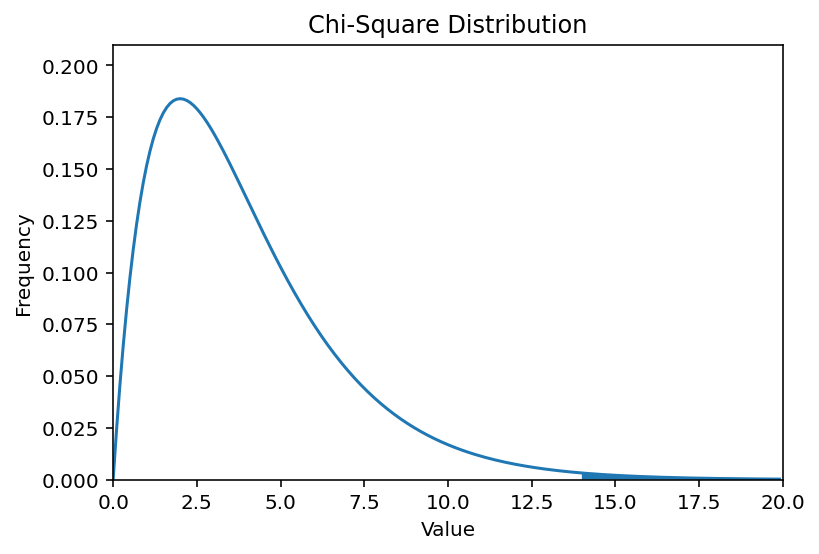

In [6]:
x = np.arange(0, 20, 0.1)
fig,ax = plt.subplots(1,1)
ax.plot(x, stats.chi2.pdf(x, degrees_freedom))
ax.fill_between(x, 0, stats.chi2.pdf(x, degrees_freedom), where=x > chi2_test_statistic)

plt.xlim(0, 20)
plt.ylim(0, 0.21)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.show()

### Conclusion

Write a conclusion of the null and alternative hypotheses above, based on the p-value you calculated.

__Answer:__

Because the p-value of .007 is less than a significance level of .01, we have convincing evidence 
against the null hypothesis, and we conclude there is a signficant relationship between academic achievement and the average number of hours per week that students work.